In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
pokemon = pd.read_csv('./data/pokemon.csv')

### Pokémon Dataset Column Descriptions and Correlations

- **#:** ID for each Pokémon in Pokedex
- **Name:** Name of each Pokémon
- **Type 1:** Each Pokémon has a type; this determines weakness/resistance to attacks
- **Type 2:** Some Pokémon are dual type and have two types
- **Total:** Sum of all stats that come after this; a general guide to how strong a Pokémon is
- **HP:** Hit points, or health, defines how much damage a Pokémon can withstand before fainting
- **Attack:** The base modifier for normal attacks (e.g., Scratch, Punch)
- **Defense:** The base damage resistance against normal attacks
- **SP Atk:** Special attack, the base modifier for special attacks (e.g., Fire Blast, Bubble Beam)
- **SP Def:** The base damage resistance against special attacks
- **Speed:** Determines which Pokémon attacks first each round

### Fase 1 - Analisis previo y limpieza 

In [3]:
pokemon

#                   Name   Type 1  Type 2  Total  HP  Attack  Defense  \
0      1              Bulbasaur    Grass  Poison    318  45      49       49   
1      2                Ivysaur    Grass  Poison    405  60      62       63   
2      3               Venusaur    Grass  Poison    525  80      82       83   
3      3  VenusaurMega Venusaur    Grass  Poison    625  80     100      123   
4      4             Charmander     Fire     NaN    309  39      52       43   
..   ...                    ...      ...     ...    ...  ..     ...      ...   
795  719                Diancie     Rock   Fairy    600  50     100      150   
796  719    DiancieMega Diancie     Rock   Fairy    700  50     160      110   
797  720    HoopaHoopa Confined  Psychic   Ghost    600  80     110       60   
798  720     HoopaHoopa Unbound  Psychic    Dark    680  80     160       60   
799  721              Volcanion     Fire   Water    600  80     110      120   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0         65       65     45           1      False  
1         80       80     60           1      False  
2        100      100     80           1      False  
3        122      120     80           1      False  
4         60       50     65           1      False  
..       ...      ...    ...         ...        ...  
795      100      150     50           6       True  
796      160      110    110           6       True  
797      150      130     70           6       True  
798      170      130     80           6       True  
799      130       90     70           6       True  

[800 rows x 13 columns]

In [4]:
#datos generales 
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [5]:
#datos estadisticos generales 
pokemon.describe(include= 'all')

#                 Name Type 1  Type 2      Total          HP  \
count   800.000000                  800    800     414  800.00000  800.000000   
unique         NaN                  800     18      18        NaN         NaN   
top            NaN  PumpkabooSuper Size  Water  Flying        NaN         NaN   
freq           NaN                    1    112      97        NaN         NaN   
mean    362.813750                  NaN    NaN     NaN  435.10250   69.258750   
std     208.343798                  NaN    NaN     NaN  119.96304   25.534669   
min       1.000000                  NaN    NaN     NaN  180.00000    1.000000   
25%     184.750000                  NaN    NaN     NaN  330.00000   50.000000   
50%     364.500000                  NaN    NaN     NaN  450.00000   65.000000   
75%     539.250000                  NaN    NaN     NaN  515.00000   80.000000   
max     721.000000                  NaN    NaN     NaN  780.00000  255.000000   

            Attack     Defense     Sp. Atk     Sp. Def       Speed  \
count   800.000000  800.000000  800.000000  800.000000  800.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean     79.001250   73.842500   72.820000   71.902500   68.277500   
std      32.457366   31.183501   32.722294   27.828916   29.060474   
min       5.000000    5.000000   10.000000   20.000000    5.000000   
25%      55.000000   50.000000   49.750000   50.000000   45.000000   
50%      75.000000   70.000000   65.000000   70.000000   65.000000   
75%     100.000000   90.000000   95.000000   90.000000   90.000000   
max     190.000000  230.000000  194.000000  230.000000  180.000000   

        Generation Legendary  
count    800.00000       800  
unique         NaN         2  
top            NaN     False  
freq           NaN       735  
mean       3.32375       NaN  
std        1.66129       NaN  
min        1.00000       NaN  
25%        2.00000       NaN  
50%        3.00000       NaN  
75%        5.00000       NaN  
max        6.00000       NaN

In [6]:
#compruebo los nombres de la columnas y que no existan espacios en los nombres 
pokemon.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [7]:
#compruebo el tamaño del df 
pokemon.shape

(800, 13)

In [8]:
#elimino la columna de la posicion en la poke dex ya que no me aporta nada 
pokemon.drop('#',  axis='columns' , inplace=True )  

In [9]:
#compruebo que sean todos valores unicos y que no existan pokemon repetidos 
pokemon.nunique

<bound method DataFrame.nunique of                       Name   Type 1  Type 2  Total  HP  Attack  Defense  \
0                Bulbasaur    Grass  Poison    318  45      49       49   
1                  Ivysaur    Grass  Poison    405  60      62       63   
2                 Venusaur    Grass  Poison    525  80      82       83   
3    VenusaurMega Venusaur    Grass  Poison    625  80     100      123   
4               Charmander     Fire     NaN    309  39      52       43   
..                     ...      ...     ...    ...  ..     ...      ...   
795                Diancie     Rock   Fairy    600  50     100      150   
796    DiancieMega Diancie     Rock   Fairy    700  50     160      110   
797    HoopaHoopa Confined  Psychic   Ghost    600  80     110       60   
798     HoopaHoopa Unbound  Psychic    Dark    680  80     160       60   
799              Volcanion     Fire   Water    600  80     110      120   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0         

In [10]:
pokemon.value_counts()

Name                     Type 1  Type 2  Total  HP   Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary
Zygarde50% Forme         Dragon  Ground  600    108  100     121      81       95       95     6           True         1
Abomasnow                Grass   Ice     494    90   92      75       92       85       60     4           False        1
AbomasnowMega Abomasnow  Grass   Ice     594    90   132     105      132      105      30     4           False        1
AegislashBlade Forme     Steel   Ghost   520    60   150     50       150      50       60     6           False        1
AegislashShield Forme    Steel   Ghost   520    60   50      150      50       150      60     6           False        1
                                                                                                                       ..
Articuno                 Ice     Flying  580    90   85      100      95       125      85     1           True         1
Aron                     Stee

In [11]:
#compruebo los nulos (hay bastante en type 2)
pokemon.isnull().sum()

Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [12]:
#le asigno una letra a los nulos de la columna tipo 2 para que no molesten
pokemon['Type 2'].fillna('x', inplace=True)

C:\Users\borja\AppData\Local\Temp\ipykernel_19748\49669012.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pokemon['Type 2'].fillna('x', inplace=True)


In [13]:
pokemon.isnull().sum()

Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

### Fase 2 - Cominezo de analisis exploratorio 

Preguntas generales


In [14]:
#Metricas generales por tipo 
pokemon.groupby('Type 1')['Total'].describe()


count        mean         std    min     25%    50%     75%    max
Type 1                                                                      
Bug        69.0  378.927536  117.875223  194.0  269.00  395.0  475.00  600.0
Dark       31.0  445.741935  109.126217  220.0  359.00  465.0  510.00  680.0
Dragon     32.0  550.531250  146.267538  300.0  420.00  600.0  680.00  780.0
Electric   44.0  443.409091  105.721952  205.0  362.25  477.5  520.00  610.0
Fairy      17.0  413.176471  123.781680  218.0  323.00  405.0  483.00  680.0
Fighting   27.0  416.444444  102.464378  210.0  326.50  455.0  497.50  625.0
Fire       52.0  458.076923  109.760496  250.0  368.00  482.0  534.00  680.0
Flying      4.0  485.000000  161.400124  245.0  462.50  557.5  580.00  580.0
Ghost      32.0  439.562500  110.072685  275.0  335.00  464.5  495.75  680.0
Grass      70.0  421.142857  106.650626  180.0  318.50  430.0  497.00  630.0
Ground     32.0  437.500000  123.913081  265.0  329.50  440.0  512.25  770.0
Ice        24.0  433.458333  108.281027  250.0  305.00  467.5  526.25  580.0
Normal     98.0  401.683673  115.733038  190.0  302.50  415.0  481.50  720.0
Poison     28.0  399.142857   92.358687  245.0  323.75  401.5  490.00  535.0
Psychic    57.0  475.947368  139.026645  198.0  336.00  485.0  600.00  780.0
Rock       44.0  453.750000  108.059227  280.0  360.25  467.5  516.50  700.0
Steel      27.0  487.703704  115.420907  300.0  425.00  500.0  580.00  700.0
Water     112.0  430.455357  113.188266  200.0  328.75  455.0  502.25  770.0

In [15]:
#Metricas generales tipo 2 
pokemon.groupby('Type 2')['Total'].describe()


count        mean         std    min     25%    50%     75%    max
Type 2                                                                      
Bug         3.0  393.333333   88.928810  330.0  342.50  355.0  425.00  495.0
Dark       20.0  484.400000  118.024262  292.0  432.75  482.5  537.50  700.0
Dragon     18.0  526.166667  140.168491  245.0  438.50  537.5  633.00  680.0
Electric    6.0  455.333333  130.625674  319.0  362.50  465.5  471.75  680.0
Fairy      23.0  417.956522  146.664577  190.0  279.00  435.0  509.00  700.0
Fighting   26.0  525.846154   98.821331  300.0  488.50  530.0  580.00  780.0
Fire       12.0  506.250000  148.983297  275.0  367.50  520.0  600.00  770.0
Flying     97.0  452.546392  122.599536  244.0  352.00  460.0  534.00  780.0
Ghost      14.0  430.714286  100.820044  236.0  346.25  464.0  482.25  600.0
Grass      25.0  408.920000   94.436451  220.0  335.00  405.0  494.00  600.0
Ground     35.0  444.342857  118.718139  210.0  384.50  450.0  517.50  700.0
Ice        14.0  525.714286  110.985397  334.0  479.75  520.5  579.25  700.0
Normal      4.0  411.500000  101.263682  289.0  349.00  425.0  487.50  507.0
Poison     34.0  396.500000  106.829587  195.0  312.00  395.0  488.75  625.0
Psychic    33.0  479.060606  126.216565  280.0  410.00  490.0  590.00  700.0
Rock       14.0  434.642857   76.169454  325.0  361.25  452.5  492.50  535.0
Steel      22.0  485.227273   89.911561  305.0  465.00  495.0  528.75  625.0
Water      14.0  418.214286  105.046641  269.0  328.75  410.0  498.75  600.0
x         386.0  412.015544  114.746993  180.0  313.25  410.0  495.00  780.0

In [16]:
#compruebo los valores maximos de ataque por tipo 
pokemon.groupby('Type 1').max().sort_values('Attack', ascending=False)

Name Type 2  Total   HP  Attack  Defense  Sp. Atk  \
Type 1                                                                         
Psychic                    Xatu      x    780  190     190      160      194   
Bug                     Yanmega      x    600   86     185      230      135   
Ground                  Vibrava      x    770  115     180      160      150   
Dragon         Zygarde50% Forme      x    780  125     180      130      180   
Rock                     Tyrunt      x    700  123     165      200      160   
Ghost                    Yamask      x    680  150     165      145      170   
Fire                     Vulpix      x    680  115     160      140      159   
Normal                Zigzagoon      x    720  255     160      126      135   
Water                    Wooper      x    770  170     155      180      180   
Dark                   Zweilous      x    680  126     150      125      140   
Steel       SteelixMega Steelix      x    700  100     150      230      150   
Fighting                Tyrogue      x    625  144     145       95      140   
Grass                Whimsicott      x    630  123     132      131      145   
Fairy                   Xerneas      x    680  126     131       95      131   
Ice                     Walrein      x    580  110     130      184      130   
Electric              Zebstrika      x    610   90     123      115      165   
Flying    TornadusTherian Forme      x    580   85     115       80      125   
Poison                    Zubat      x    535  105     106      120      100   

          Sp. Def  Speed  Generation  Legendary  
Type 1                                           
Psychic       160    180           6       True  
Bug           230    160           6      False  
Ground        120    120           5       True  
Dragon        150    120           6       True  
Rock          150    150           6       True  
Ghost         135    130           6       True  
Fire          154    126           6       True  
Normal        135    135           6       True  
Water         160    122           6       True  
Dark          130    125           6       True  
Steel         150    110           6       True  
Fighting      110    118           6      False  
Grass         129    145           6       True  
Fairy         154     99           6       True  
Ice           200    110           6       True  
Electric      110    140           6       True  
Flying         90    123           6       True  
Poison        123    130           6      False

In [17]:
#compruebo que los valores anteriores sean correctos 
 
pokemon.groupby('Type 1')['Total'].max()

Type 1
Bug         600
Dark        680
Dragon      780
Electric    610
Fairy       680
Fighting    625
Fire        680
Flying      580
Ghost       680
Grass       630
Ground      770
Ice         580
Normal      720
Poison      535
Psychic     780
Rock        700
Steel       700
Water       770
Name: Total, dtype: int64

In [18]:
#Metricas totales tipo 1 odenadas por la media 
pokemon.groupby('Type 1')['Total'].describe().sort_values('mean', ascending = False)

count        mean         std    min     25%    50%     75%    max
Type 1                                                                      
Dragon     32.0  550.531250  146.267538  300.0  420.00  600.0  680.00  780.0
Steel      27.0  487.703704  115.420907  300.0  425.00  500.0  580.00  700.0
Flying      4.0  485.000000  161.400124  245.0  462.50  557.5  580.00  580.0
Psychic    57.0  475.947368  139.026645  198.0  336.00  485.0  600.00  780.0
Fire       52.0  458.076923  109.760496  250.0  368.00  482.0  534.00  680.0
Rock       44.0  453.750000  108.059227  280.0  360.25  467.5  516.50  700.0
Dark       31.0  445.741935  109.126217  220.0  359.00  465.0  510.00  680.0
Electric   44.0  443.409091  105.721952  205.0  362.25  477.5  520.00  610.0
Ghost      32.0  439.562500  110.072685  275.0  335.00  464.5  495.75  680.0
Ground     32.0  437.500000  123.913081  265.0  329.50  440.0  512.25  770.0
Ice        24.0  433.458333  108.281027  250.0  305.00  467.5  526.25  580.0
Water     112.0  430.455357  113.188266  200.0  328.75  455.0  502.25  770.0
Grass      70.0  421.142857  106.650626  180.0  318.50  430.0  497.00  630.0
Fighting   27.0  416.444444  102.464378  210.0  326.50  455.0  497.50  625.0
Fairy      17.0  413.176471  123.781680  218.0  323.00  405.0  483.00  680.0
Normal     98.0  401.683673  115.733038  190.0  302.50  415.0  481.50  720.0
Poison     28.0  399.142857   92.358687  245.0  323.75  401.5  490.00  535.0
Bug        69.0  378.927536  117.875223  194.0  269.00  395.0  475.00  600.0

In [19]:
#El tipo de pokemon con el total max 
ptmx = pokemon.groupby('Type 1')['Total'].max()
ptmx.sort_values(ascending=False).head(1)

Type 1
Psychic    780
Name: Total, dtype: int64

In [20]:
#El tipo de pokemon con el total min 
ptmn = pokemon.groupby('Type 1')['Total'].min()
ptmn.sort_values(ascending=True).head(1)


Type 1
Grass    180
Name: Total, dtype: int64

In [21]:
#tipo de pokemon que mas hay 
pokemon['Type 1'].value_counts().head(1)

Type 1
Water    112
Name: count, dtype: int64

In [22]:
#De que tipo hay menos pokemon
pokemon['Type 1'].value_counts().tail(1)

Type 1
Flying    4
Name: count, dtype: int64

In [23]:
#e que tipo hay menos pokemon
t1 = pokemon['Type 1'].value_counts() 
t1.idxmin()
 


'Flying'

In [24]:
#Pokemon con el valor de total más alto (empate a 3 se podria desempatar y se hara)  
pokemon.sort_values('Total', ascending=False).head(3)

Name   Type 1    Type 2  Total   HP  Attack  Defense  \
426  RayquazaMega Rayquaza   Dragon    Flying    780  105     180      100   
163    MewtwoMega Mewtwo X  Psychic  Fighting    780  106     190      100   
164    MewtwoMega Mewtwo Y  Psychic         x    780  106     150       70   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  
426      180      100    115           3       True  
163      154      100    130           1       True  
164      194      120    140           1       True

In [25]:
#Total Más bajo 
pokemon.sort_values('Total').head(1)

Name Type 1 Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
206  Sunkern  Grass      x    180  30      30       30       30       30   

     Speed  Generation  Legendary  
206     30           2      False

In [26]:
#cuantos pokemon legendarios 
len(pokemon.query('Legendary == True'))

65

In [27]:
#cuantos no legendarios
len(pokemon.query('Legendary == False'))

735

In [28]:
#el pokemon de tipo dragon con el ataque mas fuerte 
pokemon[pokemon['Type 1'] == 'Dragon'].sort_values('Attack' , ascending = False).head(1)


Name  Type 1  Type 2  Total   HP  Attack  Defense  \
426  RayquazaMega Rayquaza  Dragon  Flying    780  105     180      100   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  
426      180      100    115           3       True

In [29]:
#estaditicas generales por typo roca 
pokemon[pokemon['Type 1'] == 'Rock'].describe()

Total          HP      Attack     Defense     Sp. Atk     Sp. Def  \
count   44.000000   44.000000   44.000000   44.000000   44.000000   44.000000   
mean   453.750000   65.363636   92.863636  100.795455   63.340909   75.477273   
std    108.059227   20.833884   35.325458   36.447209   28.249670   32.265965   
min    280.000000   30.000000   40.000000   40.000000   10.000000   25.000000   
25%    360.250000   50.000000   59.750000   71.500000   45.000000   50.000000   
50%    467.500000   68.500000   95.000000  100.000000   60.000000   70.000000   
75%    516.500000   80.000000  120.250000  120.500000   74.250000   90.500000   
max    700.000000  123.000000  165.000000  200.000000  160.000000  150.000000   

            Speed  Generation  
count   44.000000   44.000000  
mean    55.909091    3.454545  
std     29.903580    1.848375  
min     10.000000    1.000000  
25%     35.000000    2.000000  
50%     50.000000    3.000000  
75%     70.000000    5.000000  
max    150.000000    6.000000

In [30]:
#cuantas generaciones hay 
pokemon['Generation'].nunique()

6

In [31]:
#creo un data frame solo con un typo de pokemons 
df_fil = pokemon[pokemon['Type 1'].isin(['Grass', 'Fire', 'Water'])].sort_values('Type 1',ascending = False)
df_fil

Name Type 1   Type 2  Total   HP  Attack  Defense  \
348                 Sharpedo  Water     Dark    460   70     120       40   
562                 Samurott  Water        x    528   95     100       85   
281                Marshtomp  Water   Ground    405   70      85       70   
280                   Mudkip  Water        x    310   50      70       50   
541                   Palkia  Water   Dragon    680   90     120      100   
..                       ...    ...      ...    ...  ...     ...      ...   
169                Cyndaquil   Fire        x    309   39      52       43   
614                 Darumaka   Fire        x    315   70      90       45   
615  DarmanitanStandard Mode   Fire        x    480  105     140       55   
616       DarmanitanZen Mode   Fire  Psychic    540  105      30      105   
799                Volcanion   Fire    Water    600   80     110      120   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  
348       95       40     95           3      False  
562      108       70     70           5      False  
281       60       70     50           3      False  
280       50       50     40           3      False  
541      150      120    100           4       True  
..       ...      ...    ...         ...        ...  
169       60       50     65           2      False  
614       15       45     50           5      False  
615       30       55     95           5      False  
616      140      105     55           5      False  
799      130       90     70           6       True  

[234 rows x 12 columns]

In [32]:
# Cuantos pokemon de cada generacion 
pokemon['Generation'].value_counts()

Generation
1    166
5    165
3    160
4    121
2    106
6     82
Name: count, dtype: int64

In [33]:
#el pokemon mas rapido de la generaicon 1 
pokemon[pokemon['Generation'] == 1].sort_values('Speed' , ascending=False).head(2)

Name   Type 1  Type 2  Total  HP  Attack  Defense  \
154  AerodactylMega Aerodactyl     Rock  Flying    615  80     135       85   
71       AlakazamMega Alakazam  Psychic       x    590  55      50       65   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  
154       70       95    150           1      False  
71       175       95    150           1      False

In [34]:
#El mas fuerte de la generación 1  
pokemon[pokemon['Generation'] == 1].sort_values('Total' , ascending = False).head(1)

Name   Type 1    Type 2  Total   HP  Attack  Defense  \
163  MewtwoMega Mewtwo X  Psychic  Fighting    780  106     190      100   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  
163      154      100    130           1       True

In [35]:
#El mas fuerte de la generación 2 
pokemon[pokemon['Generation'] == 2].sort_values('Total' , ascending = False).head(1)

Name Type 1 Type 2  Total   HP  Attack  Defense  \
268  TyranitarMega Tyranitar   Rock   Dark    700  100     164      150   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  
268       95      120     71           2      False

In [36]:
#El mas fuerte de la generación 3 
pokemon[pokemon['Generation'] == 3].sort_values('Total' , ascending = False).head(1)

Name  Type 1  Type 2  Total   HP  Attack  Defense  \
426  RayquazaMega Rayquaza  Dragon  Flying    780  105     180      100   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  
426      180      100    115           3       True

In [37]:
#El mas fuerte de la generación 4  
pokemon[pokemon['Generation'] == 4].sort_values('Total' , ascending = False).head(1)

Name  Type 1 Type 2  Total   HP  Attack  Defense  Sp. Atk  Sp. Def  \
552  Arceus  Normal      x    720  120     120      120      120      120   

     Speed  Generation  Legendary  
552    120           4       True

In [38]:
#El mas fuerte de la generación 5
pokemon[pokemon['Generation'] == 5].sort_values('Total' , ascending = False).head(1)

Name  Type 1 Type 2  Total   HP  Attack  Defense  Sp. Atk  \
711  KyuremBlack Kyurem  Dragon    Ice    700  125     170      100      120   

     Sp. Def  Speed  Generation  Legendary  
711       90     95           5       True

In [39]:
#El mas fuerte de la generación 6 
pokemon[pokemon['Generation'] == 6].sort_values('Total' , ascending = False).head(1)

Name Type 1 Type 2  Total  HP  Attack  Defense  Sp. Atk  \
796  DiancieMega Diancie   Rock  Fairy    700  50     160      110      160   

     Sp. Def  Speed  Generation  Legendary  
796      110    110           6       True

In [40]:
#minimmo y maximo por estadistica y tipo 
pokemon.groupby(['Name', 'Type 1' , 'Type 2' ]).agg([min , max]).sort_values('Type 1', ascending=True)


C:\Users\borja\AppData\Local\Temp\ipykernel_19748\2450498472.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  pokemon.groupby(['Name', 'Type 1' , 'Type 2' ]).agg([min , max]).sort_values('Type 1', ascending=True)
C:\Users\borja\AppData\Local\Temp\ipykernel_19748\2450498472.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  pokemon.groupby(['Name', 'Type 1' , 'Type 2' ]).agg([min , max]).sort_values('Type 1', ascending=True)
C:\Users\borja\AppData\Local\Temp\ipykernel_19748\2450498472.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of panda

Total       HP     Attack      Defense       \
                                   min  max min max    min  max     min  max   
Name              Type 1 Type 2                                                
Kricketot         Bug    x         194  194  37  37     25   25      41   41   
PinsirMega Pinsir Bug    Flying    600  600  65  65    155  155     120  120   
Pinsir            Bug    x         500  500  65  65    125  125     100  100   
Pineco            Bug    x         290  290  50  50     65   65      90   90   
Parasect          Bug    Grass     405  405  60  60     95   95      80   80   
...                                ...  ...  ..  ..    ...  ...     ...  ...   
Squirtle          Water  x         314  314  44  44     48   48      65   65   
Starmie           Water  Psychic   520  520  60  60     75   75      85   85   
Staryu            Water  x         340  340  30  30     45   45      55   55   
Palpitoad         Water  Ground    384  384  75  75     65   65      55   55   
Lumineon          Water  x         460  460  69  69     69   69      76   76   

                                 Sp. Atk      Sp. Def     Speed       \
                                     min  max     min max   min  max   
Name              Type 1 Type 2                                        
Kricketot         Bug    x            25   25      41  41    25   25   
PinsirMega Pinsir Bug    Flying       65   65      90  90   105  105   
Pinsir            Bug    x            55   55      70  70    85   85   
Pineco            Bug    x            35   35      35  35    15   15   
Parasect          Bug    Grass        60   60      80  80    30   30   
...                                  ...  ...     ...  ..   ...  ...   
Squirtle          Water  x            50   50      64  64    43   43   
Starmie           Water  Psychic     100  100      85  85   115  115   
Staryu            Water  x            70   70      55  55    85   85   
Palpitoad         Water  Ground       65   65      55  55    69   69   
Lumineon          Water  x            69   69      86  86    91   91   

                                 Generation     Legendary         
                                        min max       min    max  
Name              Type 1 Type 2                                   
Kricketot         Bug    x                4   4     False  False  
PinsirMega Pinsir Bug    Flying           1   1     False  False  
Pinsir            Bug    x                1   1     False  False  
Pineco            Bug    x                2   2     False  False  
Parasect          Bug    Grass            1   1     False  False  
...                                     ...  ..       ...    ...  
Squirtle          Water  x                1   1     False  False  
Starmie           Water  Psychic          1   1     False  False  
Staryu            Water  x                1   1     False  False  
Palpitoad         Water  Ground           5   5     False  False  
Lumineon          Water  x                4   4     False  False  

[800 rows x 18 columns]

In [41]:
#numero de pokemon que tienen un ataque por encima de la media 
round(pokemon.describe())
len(pokemon[pokemon['Attack'] > 79])

378

In [42]:
#Numero de pokemon por debajop de la media en ataque 
len(pokemon[pokemon['Attack'] < 79])

421

##### ¿Cual de los 3 pokemon iniciales es mejor eleccion?
Asignare un punto un punto por estadistica ganadora y lo comprobare con el total.


In [43]:
#Localizo al Pokemon Bulbasur
pokemon[pokemon['Name'] == 'Bulbasaur']


Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0  Bulbasaur  Grass  Poison    318  45      49       49       65       65   

   Speed  Generation  Legendary  
0     45           1      False

In [44]:
#Localizo al pokemon Charmander
pokemon[pokemon['Name'] == 'Charmander']


Name Type 1 Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
4  Charmander   Fire      x    309  39      52       43       60       50   

   Speed  Generation  Legendary  
4     65           1      False

In [45]:
#Localizo al pokemon Squiertle
pokemon[pokemon['Name'] == 'Squirtle']

Name Type 1 Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
9  Squirtle  Water      x    314  44      48       65       50       64   

   Speed  Generation  Legendary  
9     43           1      False

In [46]:
#grupo con los pokemon iniciales 
pi = pokemon.iloc[[9,4,0]]
pi 

Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
9    Squirtle  Water       x    314  44      48       65       50       64   
4  Charmander   Fire       x    309  39      52       43       60       50   
0   Bulbasaur  Grass  Poison    318  45      49       49       65       65   

   Speed  Generation  Legendary  
9     43           1      False  
4     65           1      False  
0     45           1      False

In [47]:
#pokemon del grupo inicial con mejor ataque 
pi.sort_values('Attack' , ascending=False) 

Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
4  Charmander   Fire       x    309  39      52       43       60       50   
0   Bulbasaur  Grass  Poison    318  45      49       49       65       65   
9    Squirtle  Water       x    314  44      48       65       50       64   

   Speed  Generation  Legendary  
4     65           1      False  
0     45           1      False  
9     43           1      False

In [48]:
#pokemon del grupo inicial con mas vida 
pi.sort_values('HP' , ascending=False) 

Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0   Bulbasaur  Grass  Poison    318  45      49       49       65       65   
9    Squirtle  Water       x    314  44      48       65       50       64   
4  Charmander   Fire       x    309  39      52       43       60       50   

   Speed  Generation  Legendary  
0     45           1      False  
9     43           1      False  
4     65           1      False

In [49]:
# Pokemon del grupo inicial con el total de estadisticas mas alto 
pi.sort_values('Total' , ascending= False)

Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0   Bulbasaur  Grass  Poison    318  45      49       49       65       65   
9    Squirtle  Water       x    314  44      48       65       50       64   
4  Charmander   Fire       x    309  39      52       43       60       50   

   Speed  Generation  Legendary  
0     45           1      False  
9     43           1      False  
4     65           1      False

In [50]:
pi.sort_values

<bound method DataFrame.sort_values of          Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
9    Squirtle  Water       x    314  44      48       65       50       64   
4  Charmander   Fire       x    309  39      52       43       60       50   
0   Bulbasaur  Grass  Poison    318  45      49       49       65       65   

   Speed  Generation  Legendary  
9     43           1      False  
4     65           1      False  
0     45           1      False  >

##### ¿es pikachu la mejor eleccion ?


In [51]:
pokemon[pokemon['Name'] == 'Pikachu']

Name    Type 1 Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
30  Pikachu  Electric      x    320  35      55       40       50       50   

    Speed  Generation  Legendary  
30     90           1      False

In [52]:
#estadisticas generales del tipo electrico (el tipo de pikachu)
round(pokemon[pokemon['Type 1'] == 'Electric'].describe())

Total    HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation
count   44.0  44.0    44.0     44.0     44.0     44.0   44.0        44.0
mean   443.0  60.0    69.0     66.0     90.0     74.0   84.0         3.0
std    106.0  17.0    24.0     25.0     30.0     23.0   27.0         2.0
min    205.0  20.0    30.0     15.0     35.0     32.0   35.0         1.0
25%    362.0  50.0    54.0     50.0     65.0     55.0   60.0         2.0
50%    478.0  60.0    65.0     65.0     95.0     80.0   88.0         4.0
75%    520.0  70.0    85.0     80.0    106.0     90.0  102.0         4.0
max    610.0  90.0   123.0    115.0    165.0    110.0  140.0         6.0

In [53]:
# la media solo del ataque de los tipo electrico 
round(pokemon[pokemon['Type 1'] == 'Electric'].Attack.mean())

69

In [54]:
#todos los pokemon de tippo electrico 
round(pokemon[pokemon['Type 1'] == 'Electric'])

Name    Type 1  Type 2  Total  HP  Attack  Defense  \
30                    Pikachu  Electric       x    320  35      55       40   
31                     Raichu  Electric       x    485  60      90       55   
88                  Magnemite  Electric   Steel    325  25      35       70   
89                   Magneton  Electric   Steel    465  50      60       95   
108                   Voltorb  Electric       x    330  40      30       50   
109                 Electrode  Electric       x    480  60      50       70   
134                Electabuzz  Electric       x    490  65      83       57   
146                   Jolteon  Electric       x    525  65      65       60   
157                    Zapdos  Electric  Flying    580  90      90       85   
186                     Pichu  Electric       x    205  20      40       15   
193                    Mareep  Electric       x    280  55      40       40   
194                   Flaaffy  Electric       x    365  70      55       55   
195                  Ampharos  Electric       x    510  90      75       85   
196     AmpharosMega Ampharos  Electric  Dragon    610  90      95      105   
258                    Elekid  Electric       x    360  45      63       37   
262                    Raikou  Electric       x    580  90      85       75   
337                 Electrike  Electric       x    295  40      45       40   
338                 Manectric  Electric       x    475  70      75       60   
339   ManectricMega Manectric  Electric       x    575  70      75       80   
340                    Plusle  Electric       x    405  60      50       40   
341                     Minun  Electric       x    405  60      40       50   
448                     Shinx  Electric       x    263  45      65       34   
449                     Luxio  Electric       x    363  60      85       49   
450                    Luxray  Electric       x    523  80     120       79   
464                 Pachirisu  Electric       x    405  60      45       70   
513                 Magnezone  Electric   Steel    535  70      70      115   
517                Electivire  Electric       x    540  75     123       67   
531                     Rotom  Electric   Ghost    440  50      50       77   
532           RotomHeat Rotom  Electric    Fire    520  50      65      107   
533           RotomWash Rotom  Electric   Water    520  50      65      107   
534          RotomFrost Rotom  Electric     Ice    520  50      65      107   
535            RotomFan Rotom  Electric  Flying    520  50      65      107   
536            RotomMow Rotom  Electric   Grass    520  50      65      107   
581                   Blitzle  Electric       x    295  45      60       32   
582                 Zebstrika  Electric       x    497  75     100       63   
648                    Emolga  Electric  Flying    428  55      75       60   
663                    Tynamo  Electric       x    275  35      55       40   
664                 Eelektrik  Electric       x    405  65      85       70   
665                Eelektross  Electric       x    515  85     115       80   
704  ThundurusIncarnate Forme  Electric  Flying    580  79     115       70   
705    ThundurusTherian Forme  Electric  Flying    580  79     105       70   
764                Helioptile  Electric  Normal    289  44      38       33   
765                 Heliolisk  Electric  Normal    481  62      55       52   
772                   Dedenne  Electric   Fairy    431  67      58       57   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  
30        50       50     90           1      False  
31        90       80    110           1      False  
88        95       55     45           1      False  
89       120       70     70           1      False  
108       55       55    100           1      False  
109       80       80    140           1      False  
134       95       85    105           1      False  
146      110       95    130         

In [55]:
#El Pokémon  mas fuerte electrico 
pokemon[pokemon['Type 1'] == 'Electric'].sort_values('Total', ascending = False).head(1)

Name    Type 1  Type 2  Total  HP  Attack  Defense  \
196  AmpharosMega Ampharos  Electric  Dragon    610  90      95      105   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  
196      165      110     45           2      False

In [56]:
#El Pokémon  mas debil  electrico 
pokemon[pokemon['Type 1'] == 'Electric'].sort_values('Total').head(1)

Name    Type 1 Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
186  Pichu  Electric      x    205  20      40       15       35       35   

     Speed  Generation  Legendary  
186     60           2      False

In [57]:
pokemon[pokemon['Name'] == 'Eternatus']

Empty DataFrame
Columns: [Name, Type 1, Type 2, Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed, Generation, Legendary]
Index: []

### Visualizaciones 

([<matplotlib.patches.Wedge at 0x1f67fe89400>,
 [Text(0.995309757563562, 0.4683572210383475, 'Water'),
  Text(0.33169184093511905, 1.0487995626701376, 'Normal'),
  Text(-0.38072871039866113, 1.0320104888411612, 'Grass'),
  Text(-0.8611677119802669, 0.6843903651007021, 'Bug'),
  Text(-1.0828692739909174, 0.19337563302128707, 'Psychic'),
  Text(-1.0654414905459044, -0.27355882406407844, 'Fire'),
  Text(-0.8899184718302892, -0.6465640830538323, 'Rock'),
  Text(-0.6182919259650814, -0.9097884887633996, 'Electric'),
  Text(-0.32344447301654244, -1.0513722808192403, 'Ground'),
  Text(-0.051816579827776044, -1.0987788867897634, 'Ghost'),
  Text(0.2230661273215511, -1.077145070471831, 'Dragon'),
  Text(0.48005106648808793, -0.9897226750780491, 'Dark'),
  Text(0.6944887293282358, -0.8530447847774774, 'Poison'),
  Text(0.8611680981541949, -0.6843898791781532, 'Fighting'),
  Text(0.9859226635657357, -0.48780785301945023, 'Steel'),
  Text(1.0632602661804214, -0.28191772977579754, 'Ice'),
  Text(1.

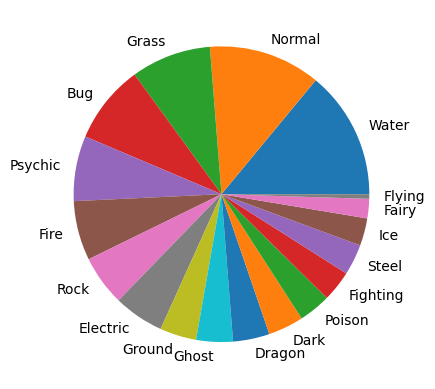

In [58]:
#volumen pokemon por tipos
plt.pie(pokemon['Type 1'].value_counts(), labels = pokemon['Type 1'].value_counts().index)

In [59]:
#pi_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

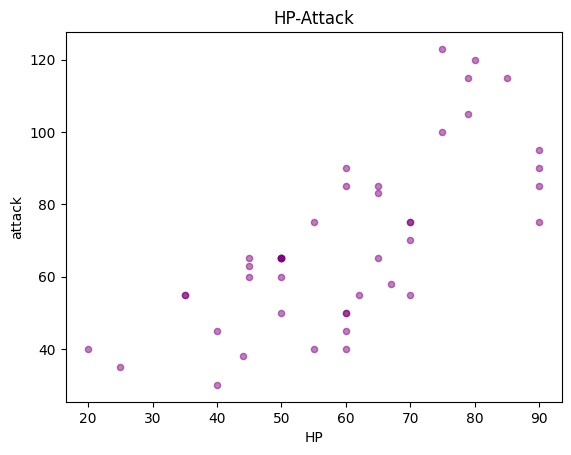

In [60]:
el = pokemon[pokemon['Type 1'] == 'Electric']
el.plot(kind='scatter',x='HP',y='Attack',alpha=0.5,color='purple')
plt.xlabel('HP')
plt.ylabel('attack')
plt.title('HP-Attack')
plt.show()

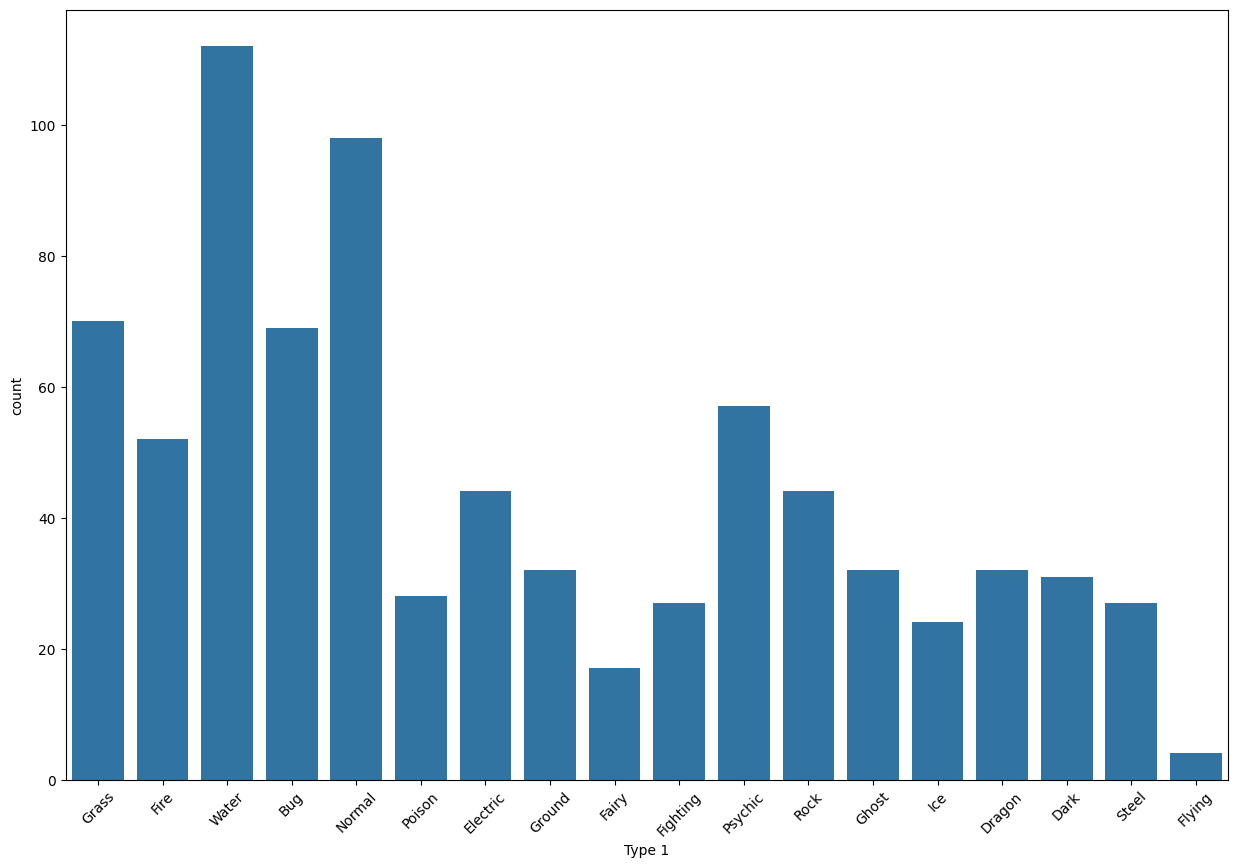

In [61]:
plt.figure(figsize=(15,10))
sns.countplot(x='Type 1', data=pokemon, )
plt.xticks(rotation = 45)
plt.show()

C:\Users\borja\AppData\Local\Temp\ipykernel_19748\1993314241.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=pokemon, x='Type 1', y='Defense', palette='Set2', kind="bar", height=8)


<Figure size 1500x1200 with 0 Axes>

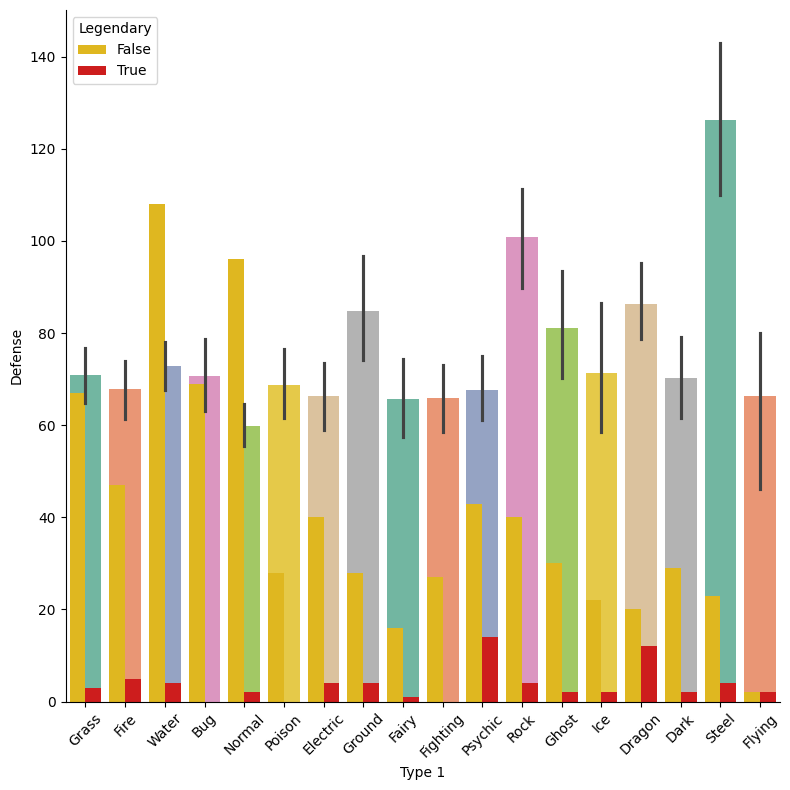

In [62]:
plt.figure(figsize=(15, 12))
sns.catplot(data=pokemon, x='Type 1', y='Defense', palette='Set2', kind="bar", height=8)
sns.countplot(data=pokemon, x='Type 1', hue='Legendary', palette='hot_r')
plt.xticks(rotation = 45)


plt.tight_layout()
plt.show()

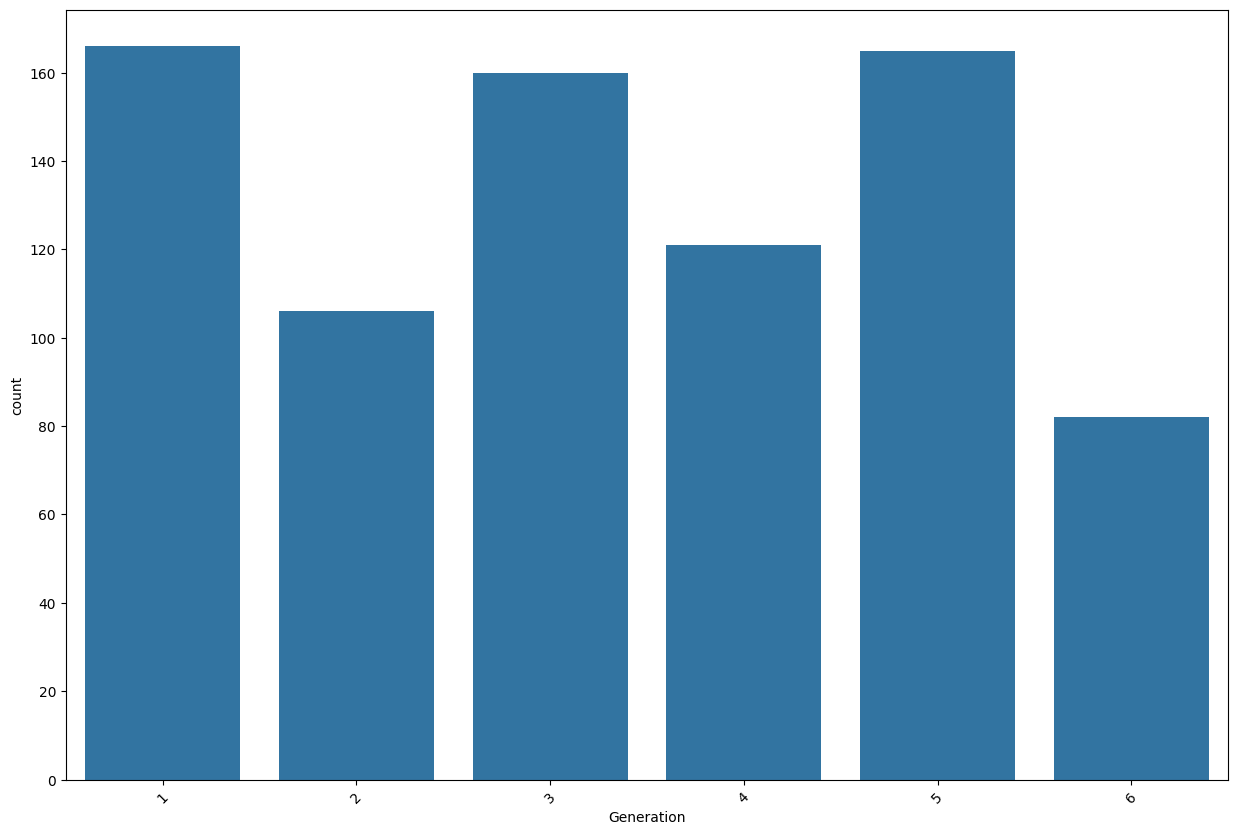

In [63]:
plt.figure(figsize=(15,10))
sns.countplot(x='Generation', data=pokemon, )
plt.xticks(rotation = 45)
plt.show()

<Figure size 1500x1000 with 0 Axes>

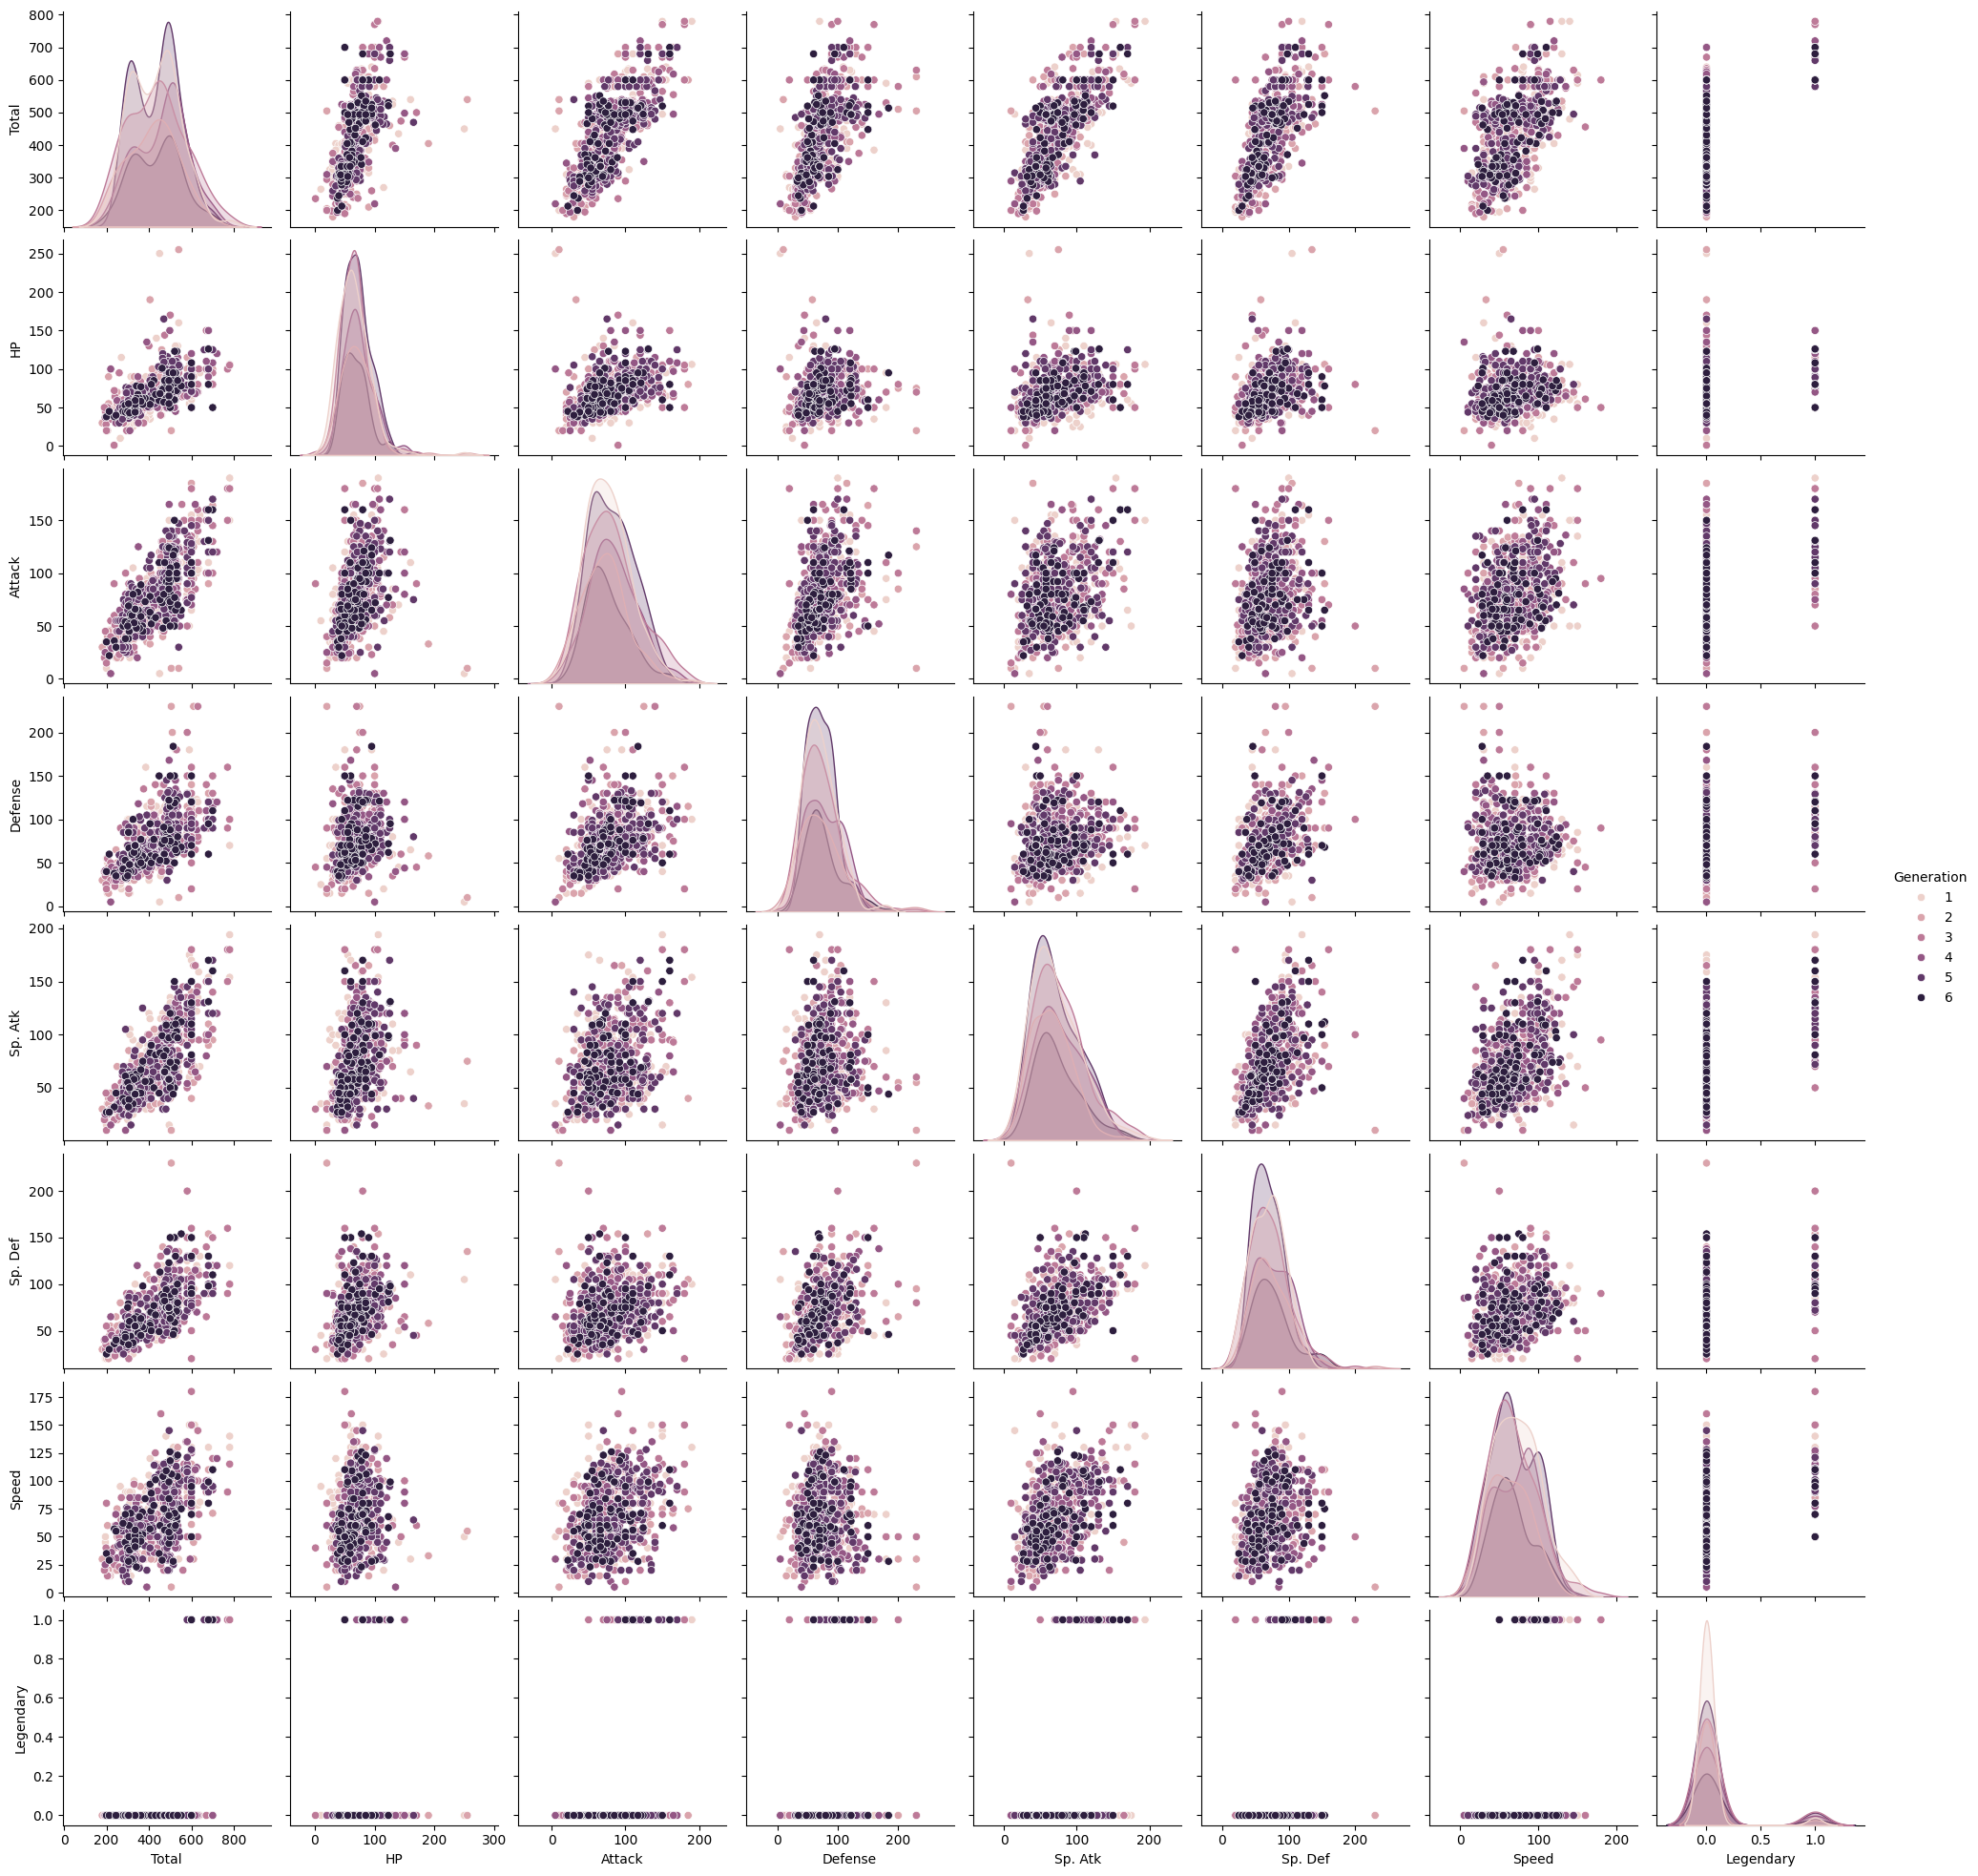

In [64]:
plt.figure(figsize=(15,10))
sns.pairplot(data=pokemon, hue = 'Generation')
plt.show()

In [65]:
#colores 
palette_generation = {
    1: '#0865de',      
    2: '#08d8de',     
    3: '#de0859',       
    4: '#d108de',    
    5: '#de8d08',    
    6: '#e13dd4',      
    7: '#5fc8c3'      
}

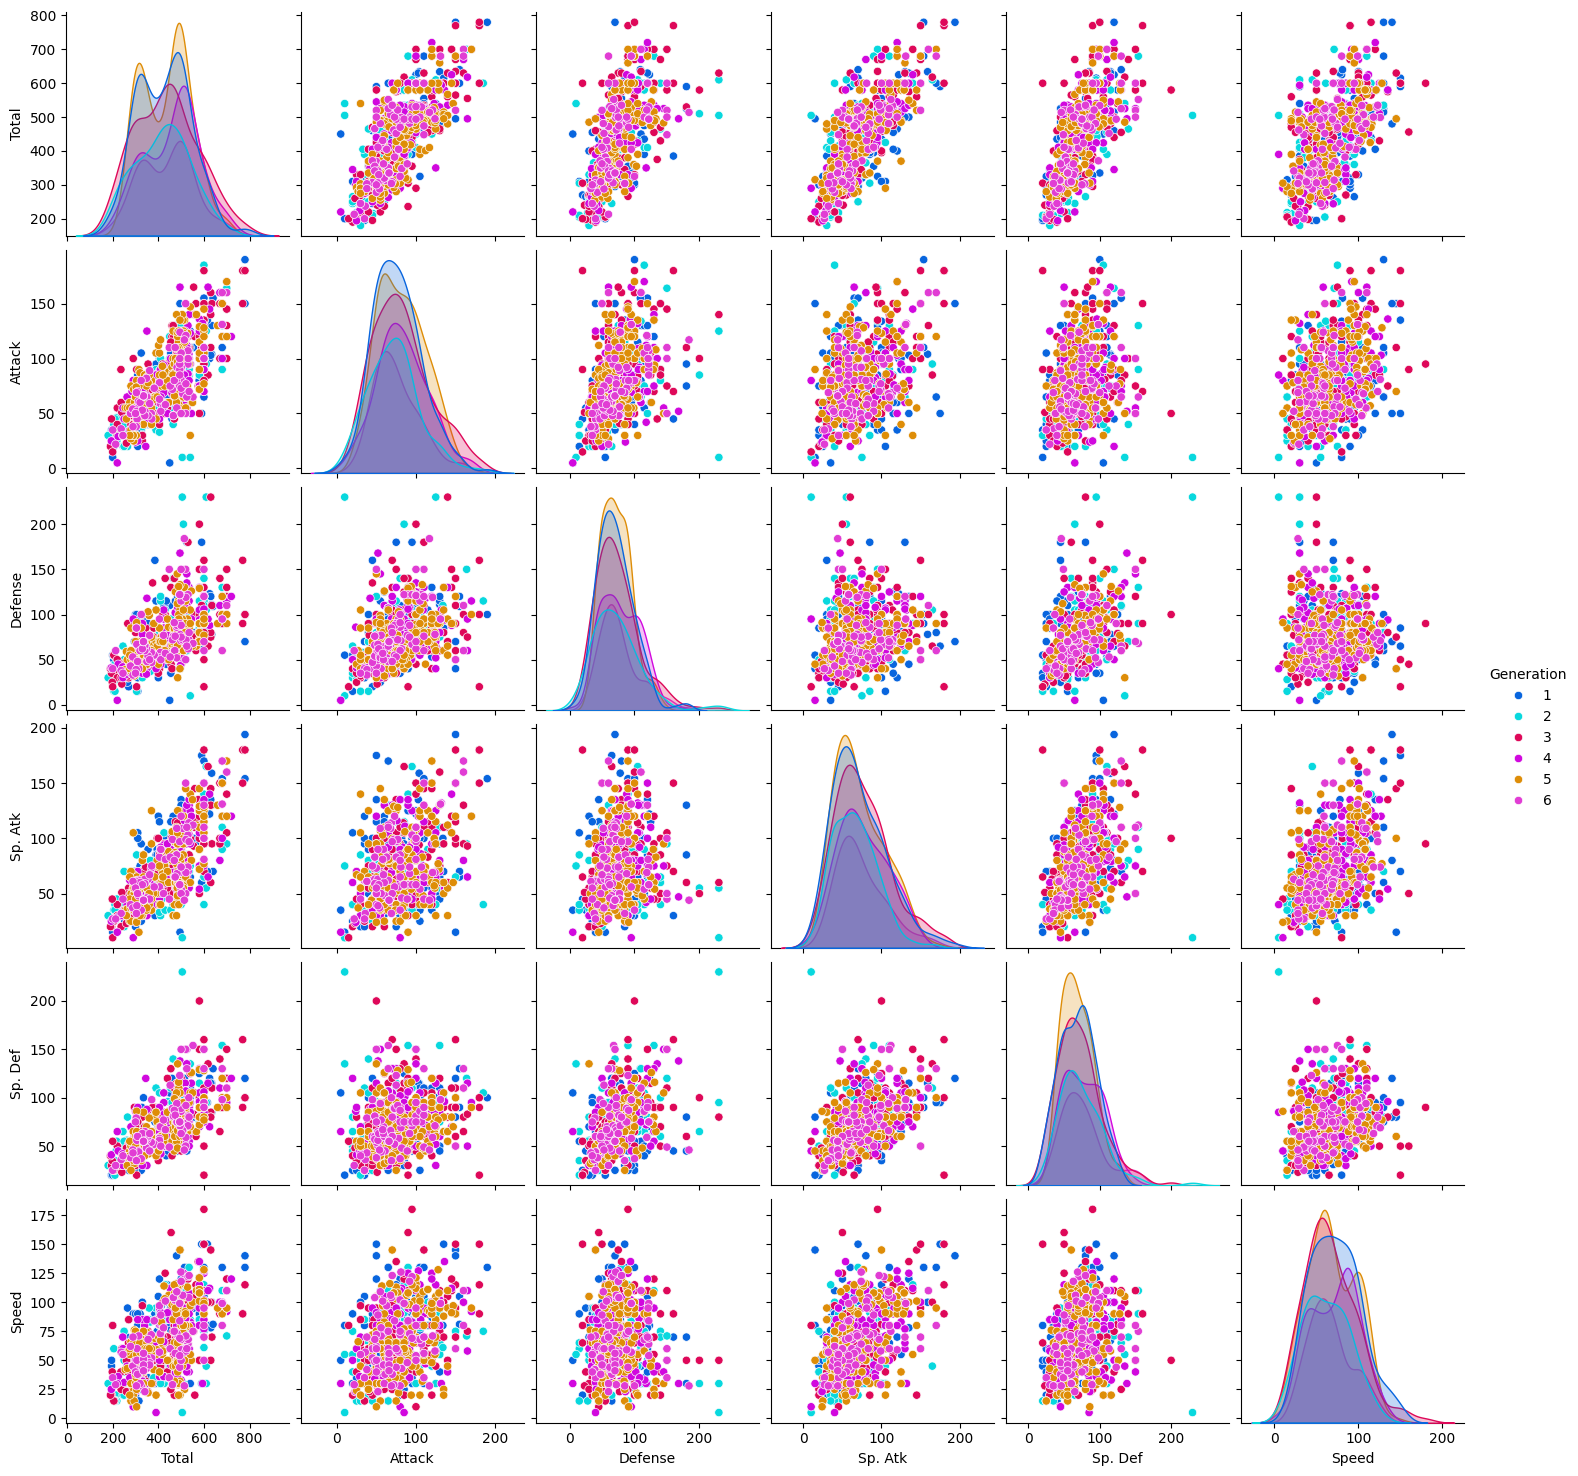

In [66]:
 sns.pairplot(pokemon, vars=['Total','Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'], hue='Generation', palette=palette_generation)

C:\Users\borja\AppData\Local\Temp\ipykernel_19748\2303792367.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(pi, x='Name', y='Total', palette=['#41bee6', '#d51717', '#79f5bf'], kind="bar")


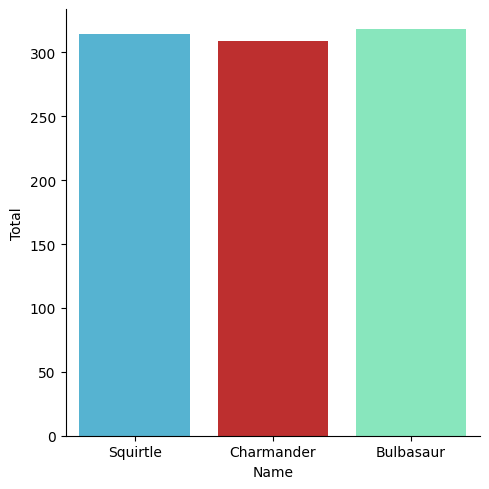

In [67]:
sns.catplot(pi, x='Name', y='Total', palette=['#41bee6', '#d51717', '#79f5bf'], kind="bar") 


In [68]:
import plotly.graph_objects as go  # Importa la librería para gráficos


# Define la función para comparar estadísticas de pokémon
def PokeFight(pokemon, p1, p2, p3):
    # Obtiene los datos del pokémon desde el DataFrame
    def get_stats(df, name):
        poke = df[df["Name"] == name]
        if poke.empty:
            raise ValueError(f"Pokémon {name} no encontrado.")
        return [
            poke['HP'].values[0],
            poke['Attack'].values[0],
            poke['Defense'].values[0],
            poke['Sp. Atk'].values[0],
            poke['Sp. Def'].values[0],
            poke['Speed'].values[0],
            poke['HP'].values[0]  # Repite HP para cerrar el gráfico
        ]
    
    # Prepara los datos de cada pokémon
    trace1 = go.Scatterpolar(
        r=get_stats(pokemon, p1),
        theta=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'HP'],
        fill='toself',
        name=p1
    )
    trace2 = go.Scatterpolar(
        r=get_stats(pokemon, p2),
        theta=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'HP'],
        fill='toself',
        name=p2
    )
    trace3 = go.Scatterpolar(
        r=get_stats(pokemon, p3),
        theta=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'HP'],
        fill='toself',
        name=p3
    )
    
    # Configura el layout del gráfico
    layout = go.Layout(
        title="Pokémons' Performance",
        polar=dict(
            radialaxis=dict(visible=True)
        ),
        showlegend=True
    )
    
    # Combina los datos y genera la figura
    fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
    
    # Muestra el gráfico
    fig.show()



# Llama a la función con los nombres de los pokémon
PokeFight(pokemon, 'Squirtle', 'Charmander', 'Bulbasaur')


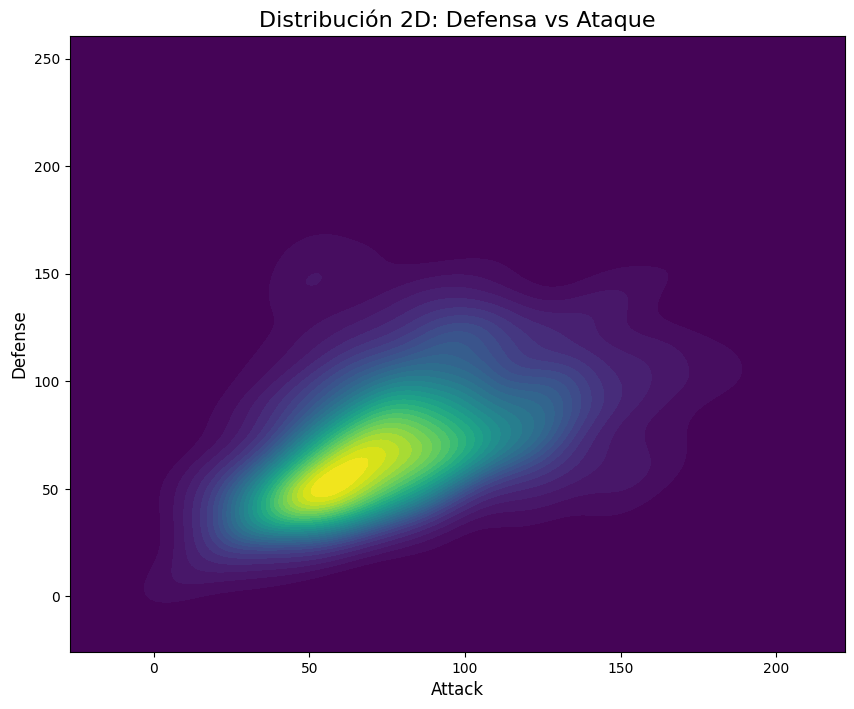

In [69]:

plt.figure(figsize=(10, 8))


sns.kdeplot(
    data=pokemon, 
    x='Attack', 
    y='Defense', 
    cmap='viridis', 
    fill=True, 
    levels=30, 
    thresh=0
)


plt.title('Distribución 2D: Defensa vs Ataque', fontsize=16)
plt.xlabel('Attack', fontsize=12)
plt.ylabel('Defense', fontsize=12)


plt.show()


c:\Users\borja\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1883: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


c:\Users\borja\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1889: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




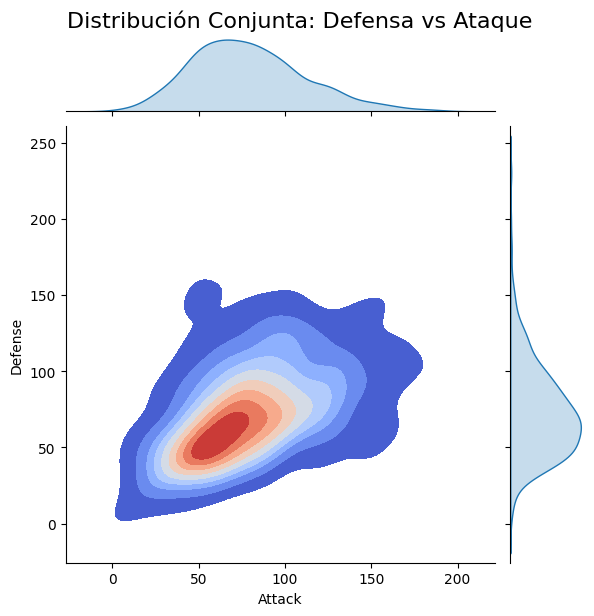

In [70]:

sns.jointplot(
    data=pokemon,
    x='Attack',
    y='Defense',
    kind='kde', 
    fill=True,   
    cmap='coolwarm', 
    marginal_kws={'shade': True}  
)


plt.suptitle('Distribución Conjunta: Defensa vs Ataque', fontsize=16, y=1.02)
plt.show()

<Figure size 1500x1000 with 0 Axes>

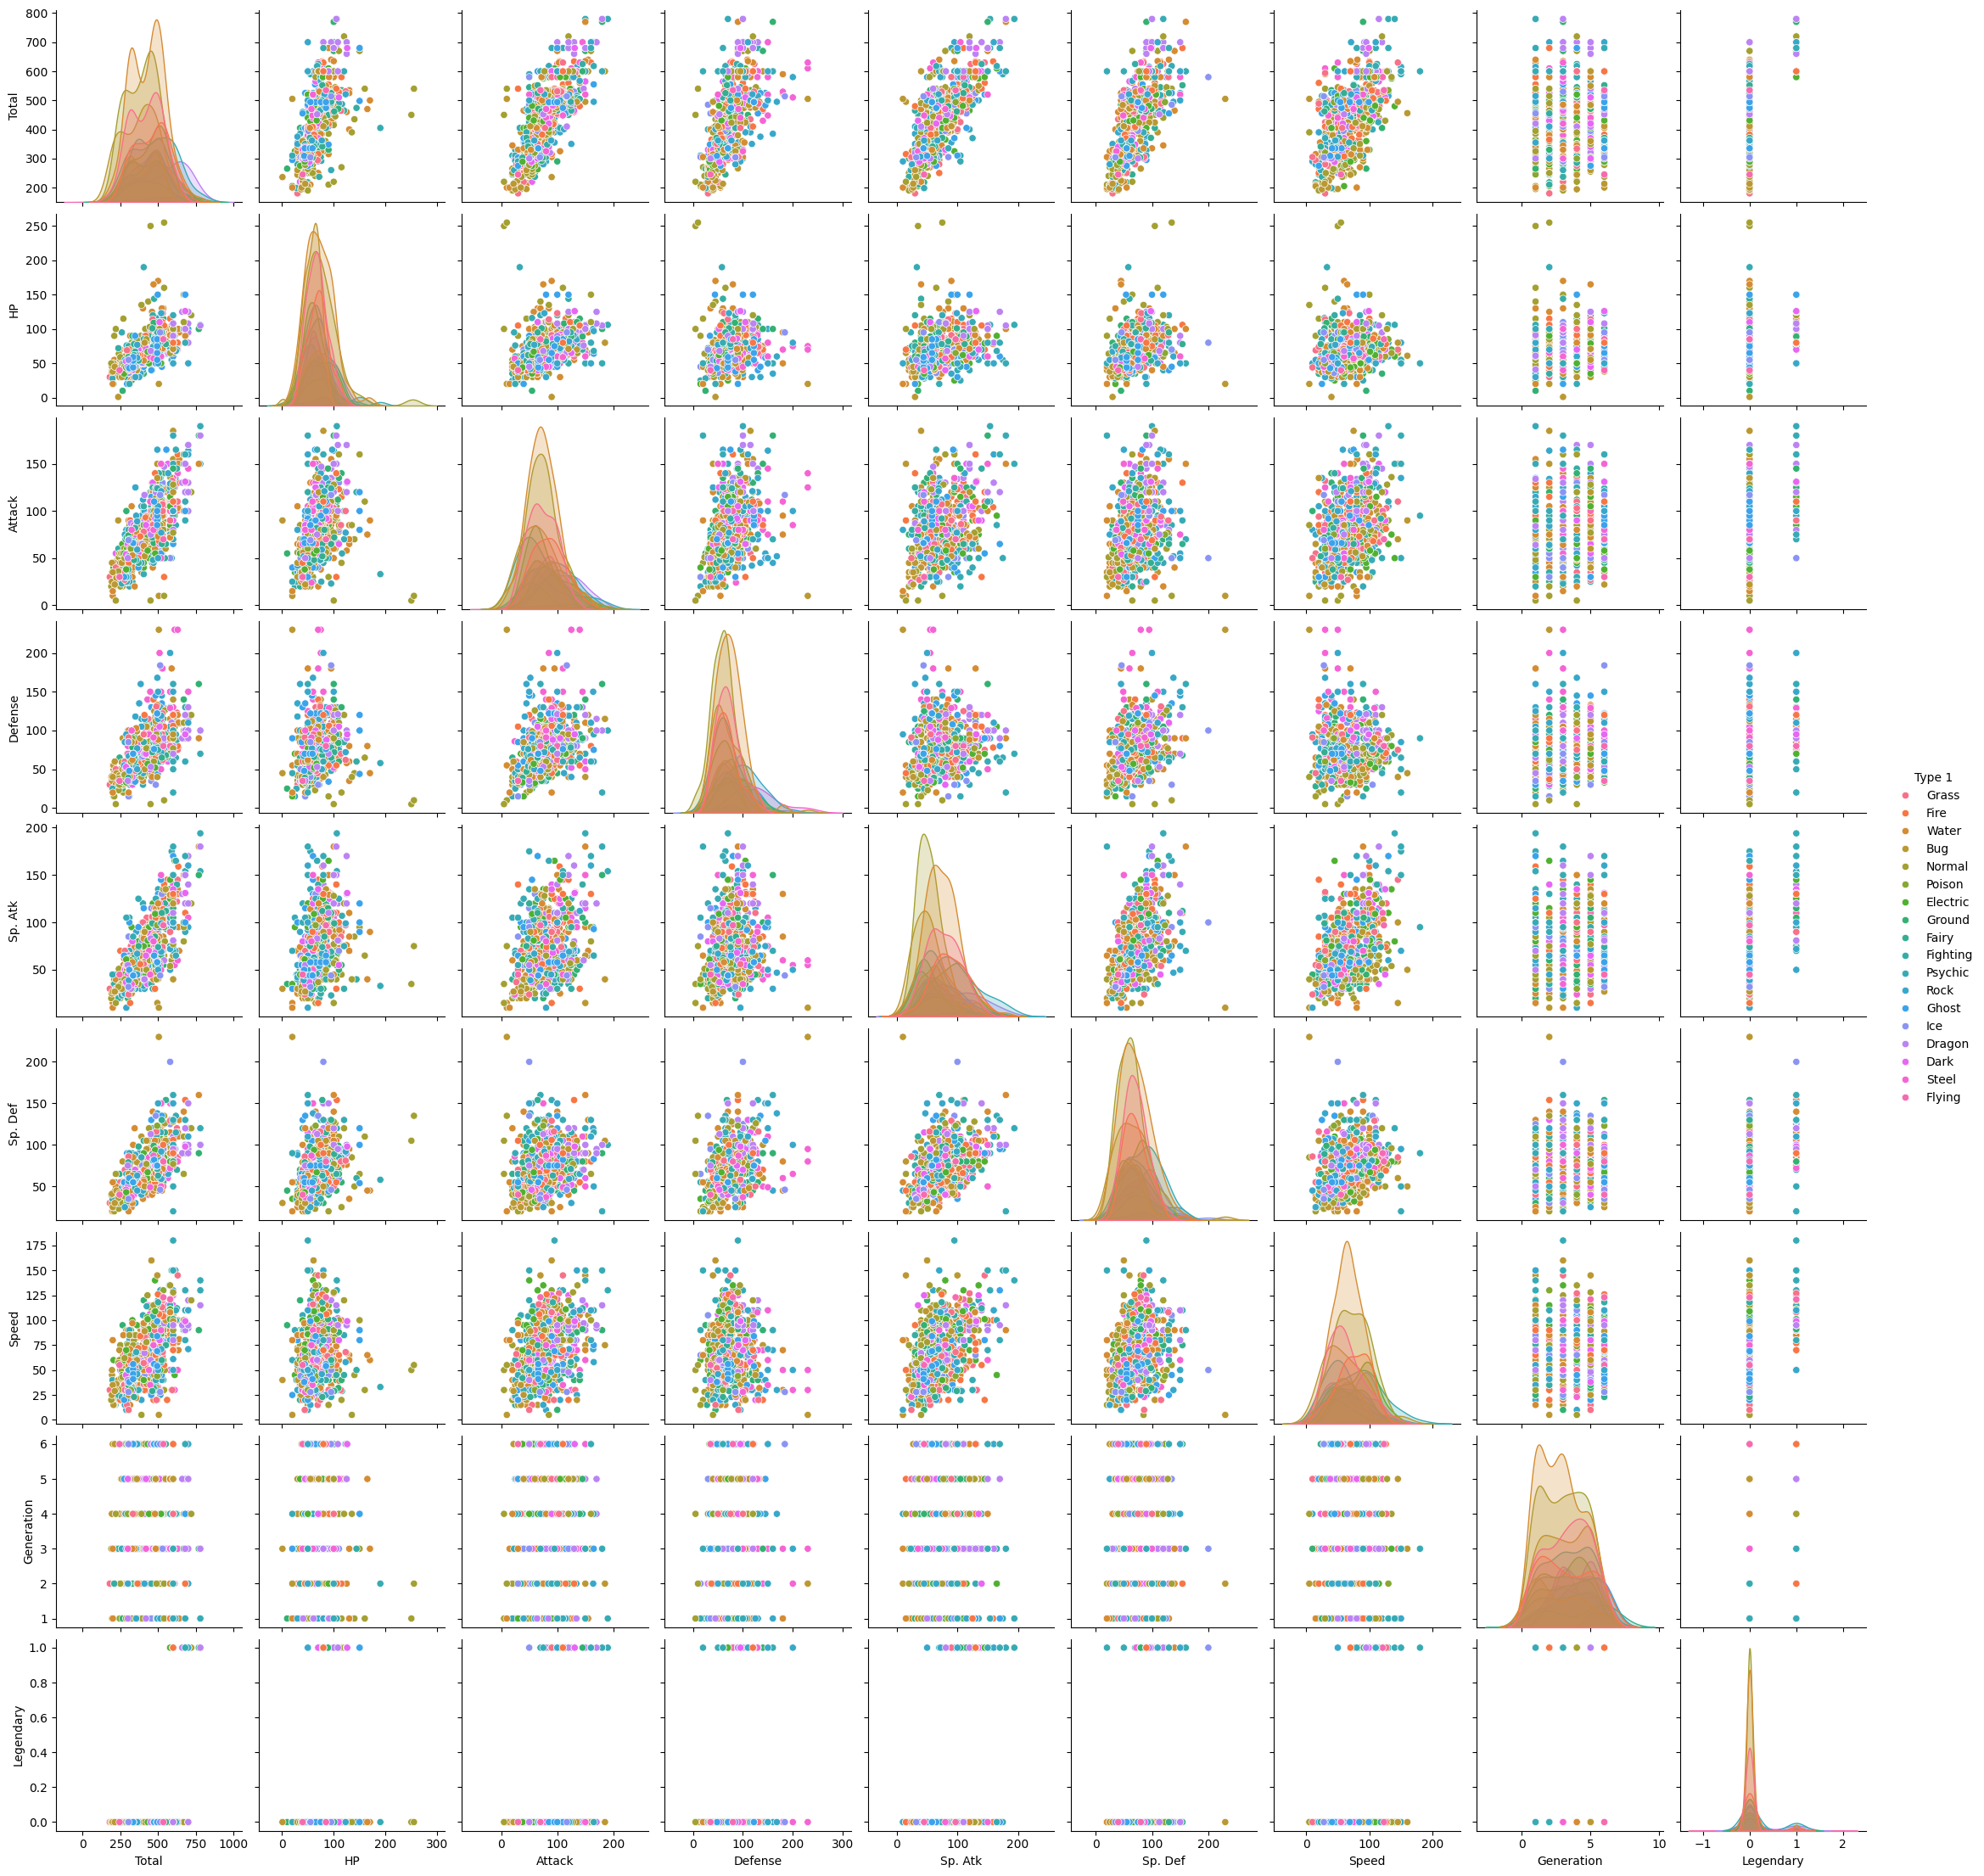

In [71]:
plt.figure(figsize=(15,10))
sns.pairplot(data=pokemon, hue = 'Type 1')
plt.show()

<Axes: xlabel='Total'>

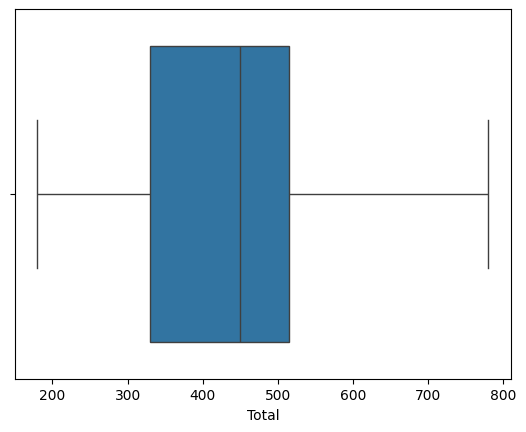

In [72]:
sns.boxplot(x=pokemon['Total'])


<Axes: >

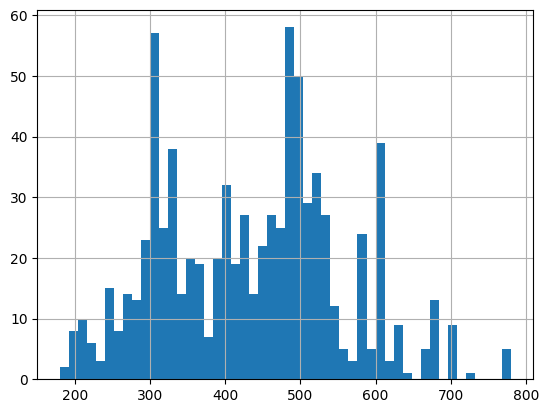

In [73]:
pokemon['Total'].hist(bins=50)

<Axes: >

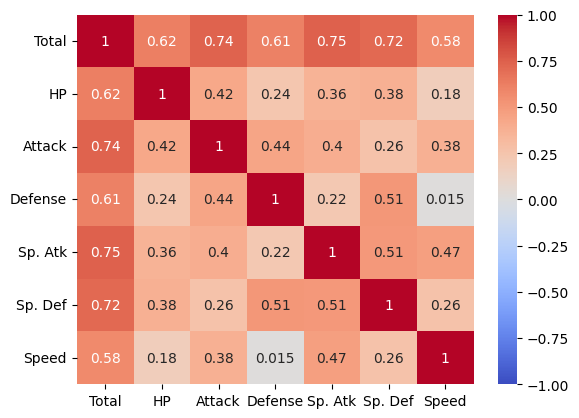

In [74]:



sns.heatmap(pokemon[['Total','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']].corr(), annot=True, cmap="coolwarm", vmin=-1)

In [75]:
import plotly.graph_objects as go  # Importa la librería para gráficos


# Define la función para comparar estadísticas de pokémon
def PokeFight(pokemon, p1, p2, p3):
    # Obtiene los datos del pokémon desde el DataFrame
    def get_stats(df, name):
        poke = df[df["Name"] == name]
        if poke.empty:
            raise ValueError(f"Pokémon {name} no encontrado.")
        return [
            poke['HP'].values[0],
            poke['Attack'].values[0],
            poke['Defense'].values[0],
            poke['Sp. Atk'].values[0],
            poke['Sp. Def'].values[0],
            poke['Speed'].values[0],
            poke['HP'].values[0]  # Repite HP para cerrar el gráfico
        ]
    
    # Prepara los datos de cada pokémon
    trace1 = go.Scatterpolar(
        r=get_stats(pokemon, p1),
        theta=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'HP'],
        fill='toself',
        name=p1
    )
    trace2 = go.Scatterpolar(
        r=get_stats(pokemon, p2),
        theta=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'HP'],
        fill='toself',
        name=p2
    )
    trace3 = go.Scatterpolar(
        r=get_stats(pokemon, p3),
        theta=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'HP'],
        fill='toself',
        name=p3
    )
    
    # Configura el layout del gráfico
    layout = go.Layout(
        title="Pikachu Vs Best Electric and Best pokemon",
        polar=dict(
            radialaxis=dict(visible=True)
        ),
        showlegend=True
    )
    
    # Combina los datos y genera la figura
    fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
    
    # Muestra el gráfico
    fig.show()



# Llama a la función con los nombres de los pokémon
PokeFight(pokemon, 'Pikachu', 'AmpharosMega Ampharos', 'RayquazaMega Rayquaza')



In [76]:
import plotly.graph_objects as go  # Importa la librería para gráficos


# Define la función para comparar estadísticas de pokémon
def PokeFight(pokemon, p1, p2, p3):
    # Obtiene los datos del pokémon desde el DataFrame
    def get_stats(df, name):
        poke = df[df["Name"] == name]
        if poke.empty:
            raise ValueError(f"Pokémon {name} no encontrado.")
        return [
            poke['HP'].values[0],
            poke['Attack'].values[0],
            poke['Defense'].values[0],
            poke['Sp. Atk'].values[0],
            poke['Sp. Def'].values[0],
            poke['Speed'].values[0],
            poke['HP'].values[0]  # Repite HP para cerrar el gráfico
        ]
    
    # Prepara los datos de cada pokémon
    trace1 = go.Scatterpolar(
        r=get_stats(pokemon, p1),
        theta=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'HP'],
        fill='toself',
        name=p1
    )
    trace2 = go.Scatterpolar(
        r=get_stats(pokemon, p2),
        theta=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'HP'],
        fill='toself',
        name=p2
    )
    trace3 = go.Scatterpolar(
        r=get_stats(pokemon, p3),
        theta=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'HP'],
        fill='toself',
        name=p3
    )
    
    # Configura el layout del gráfico
    layout = go.Layout(
        title="· best Total Fight",
        polar=dict(
            radialaxis=dict(visible=True)
        ),
        showlegend=True
    )
    
    # Combina los datos y genera la figura
    fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
    
    # Muestra el gráfico
    fig.show()






# Llama a la función con los nombres de los pokémon
PokeFight(pokemon, 'RayquazaMega Rayquaza', 'MewtwoMega Mewtwo X', 'MewtwoMega Mewtwo Y')

In [77]:
pokemon.sort_values('Total', ascending=False).head(3)

Name   Type 1    Type 2  Total   HP  Attack  Defense  \
426  RayquazaMega Rayquaza   Dragon    Flying    780  105     180      100   
163    MewtwoMega Mewtwo X  Psychic  Fighting    780  106     190      100   
164    MewtwoMega Mewtwo Y  Psychic         x    780  106     150       70   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  
426      180      100    115           3       True  
163      154      100    130           1       True  
164      194      120    140           1       True

In [78]:
pokemon.loc[pokemon.groupby('Type 1')['Attack'].idxmax(), ['Type 1', 'Name']]


Type 1                     Name
232       Bug  HeracrossMega Heracross
393      Dark          AbsolMega Absol
426    Dragon    RayquazaMega Rayquaza
517  Electric               Electivire
792     Fairy                  Xerneas
498  Fighting      LucarioMega Lucario
279      Fire    BlazikenMega Blaziken
702    Flying  TornadusIncarnate Forme
387     Ghost      BanetteMega Banette
511     Grass  AbomasnowMega Abomasnow
424    Ground    GroudonPrimal Groudon
524       Ice                Mamoswine
313    Normal                  Slaking
504    Poison                Toxicroak
163   Psychic      MewtwoMega Mewtwo X
454      Rock                Rampardos
750     Steel     AegislashBlade Forme
141     Water    GyaradosMega Gyarados

In [79]:
electric_pokemon = pokemon[pokemon['Type 1'] == 'Electric']
electric_pokemon['pikachu'] = electric_pokemon['Name'].apply(lambda x: 'Pikachu' if x == 'Pikachu' else 'Others')

C:\Users\borja\AppData\Local\Temp\ipykernel_19748\2741850498.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



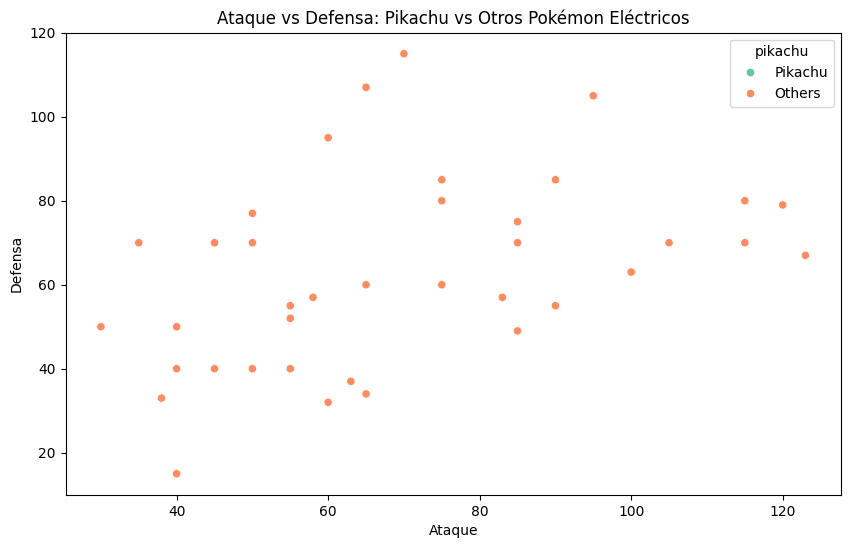

In [80]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=electric_pokemon, x='Attack', y='Defense', hue='pikachu', palette='Set2')
plt.title('Ataque vs Defensa: Pikachu vs Otros Pokémon Eléctricos')
plt.xlabel('Ataque')
plt.ylabel('Defensa')
plt.show()

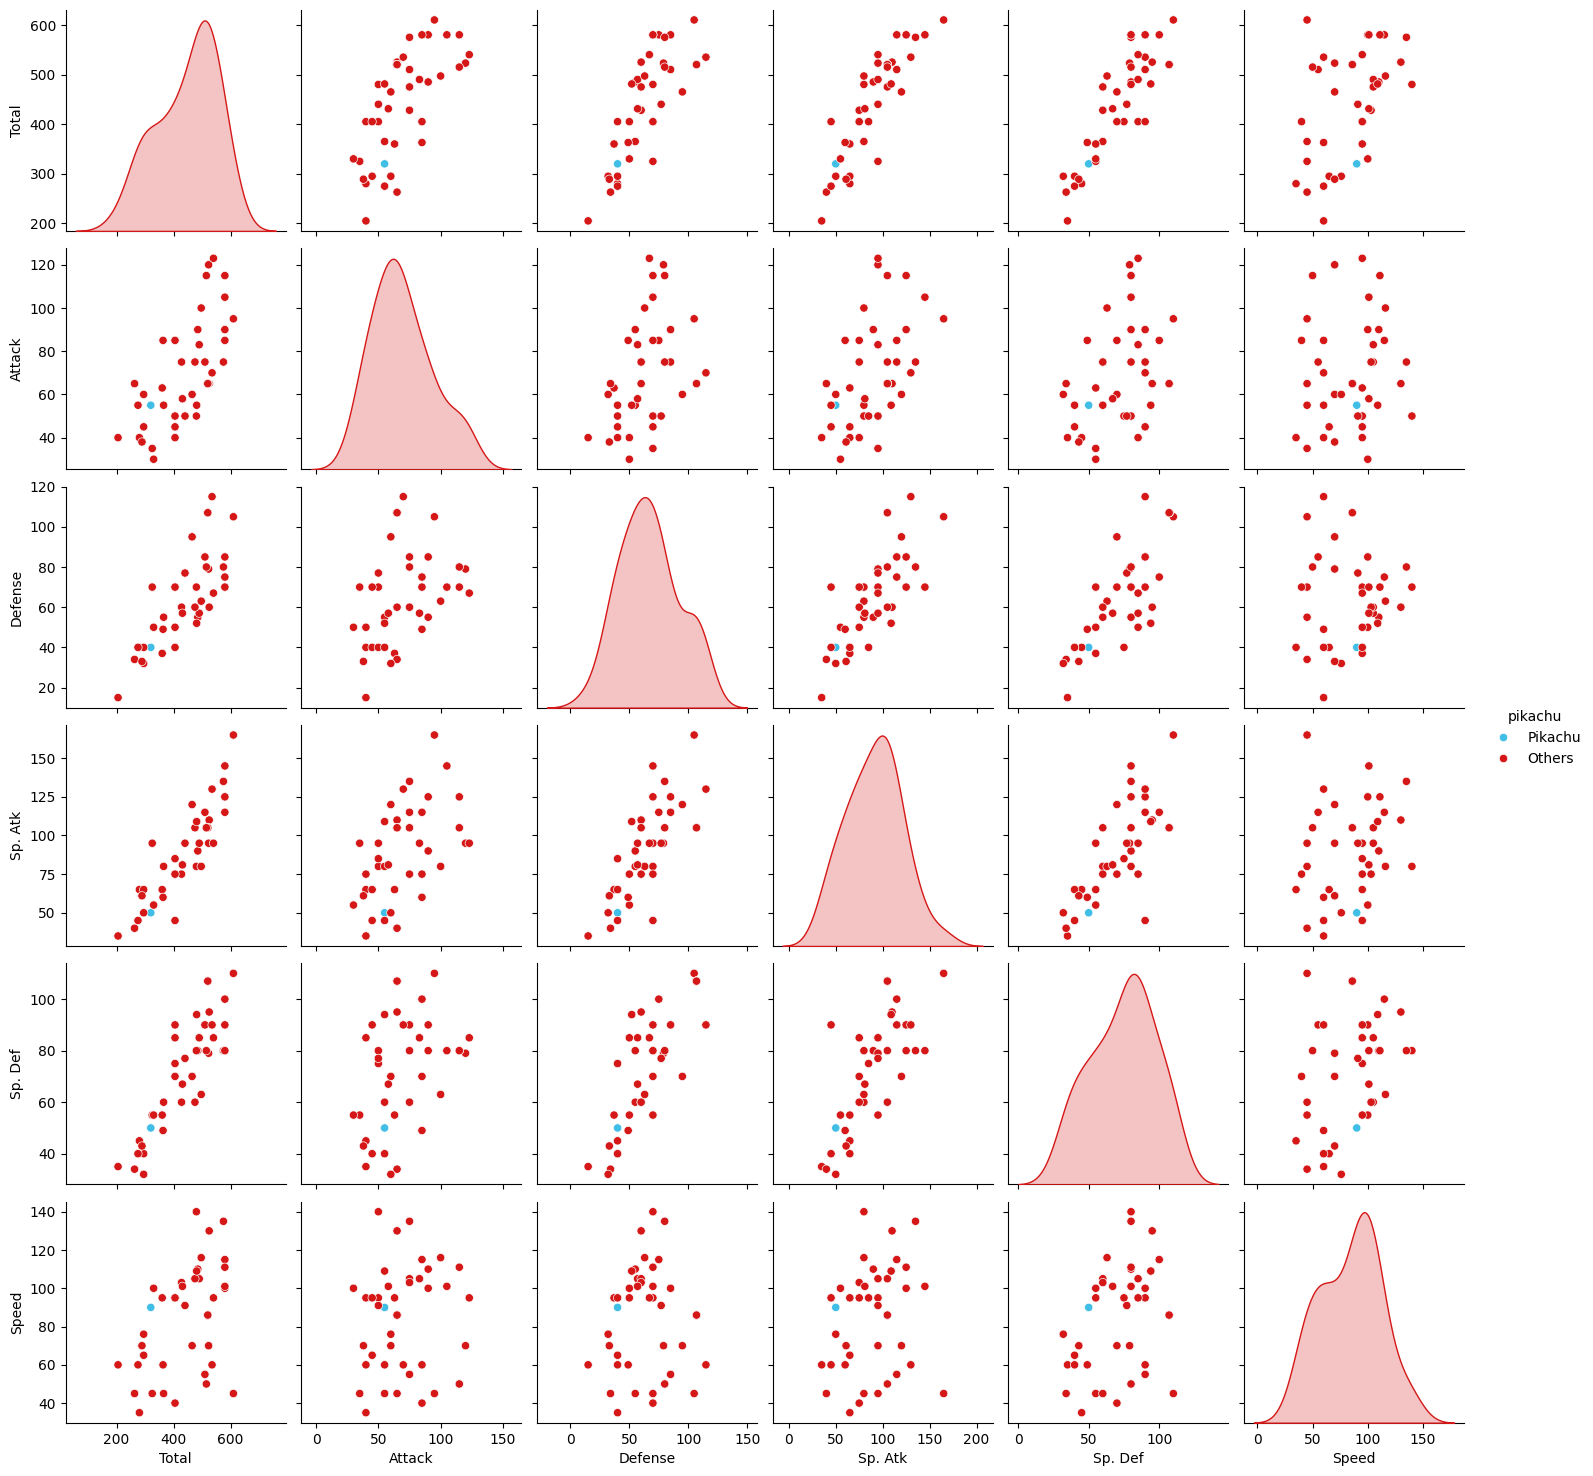

In [81]:
sns.pairplot(electric_pokemon, vars=['Total', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'],
             hue='pikachu', palette=['#41bee6', '#d51717'])